## Step 1: Reading and Understanding the Data

In [ ]:
# Importing all required packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [ ]:
#Importing dataset
pd01 = pd.read_csv('day.csv')
pd01 = pd01.drop(['instant','atemp'],axis=1)

In [ ]:
#Let's explore the top 5 rows
pd01.head()

,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,hum,windspeed,casual,registered,cnt
0,01-01-2018,1,0,1,0,1,1,2,14.110847,80.5833,10.749882,331,654,985
1,02-01-2018,1,0,1,0,2,1,2,14.902598,69.6087,16.652113,131,670,801
2,03-01-2018,1,0,1,0,3,1,1,8.050924,43.7273,16.636703,120,1229,1349
3,04-01-2018,1,0,1,0,4,1,1,8.200000,59.0435,10.739832,108,1454,1562
4,05-01-2018,1,0,1,0,5,1,1,9.305237,43.6957,12.522300,82,1518,1600


In [ ]:
pd01.shape

(730, 14)

In [ ]:
pd01.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 14 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   dteday      730 non-null    object 
 1   season      730 non-null    int64  
 2   yr          730 non-null    int64  
 3   mnth        730 non-null    int64  
 4   holiday     730 non-null    int64  
 5   weekday     730 non-null    int64  
 6   workingday  730 non-null    int64  
 7   weathersit  730 non-null    int64  
 8   temp        730 non-null    float64
 9   hum         730 non-null    float64
 10  windspeed   730 non-null    float64
 11  casual      730 non-null    int64  
 12  registered  730 non-null    int64  
 13  cnt         730 non-null    int64  
dtypes: float64(3), int64(10), object(1)
memory usage: 80.0+ KB


In [ ]:
def season(x):
    if x==1:
        return "spring"
    elif x==2:
        return "summer"
    elif x==3:
        return "fall"
    else:
        return "winter"

pd01.season = pd01.season.apply(season)

In [ ]:
def weather(x):
    if x==1:
        return "Clear"
    elif x==2:
        return "Cloudy"
    elif x==3:
        return "Light Rain"
    else:
        return "Heavy Rain"

pd01.weathersit = pd01.weathersit.apply(weather)

In [ ]:
pd01.head()

,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,hum,windspeed,casual,registered,cnt
0,01-01-2018,spring,0,1,0,1,1,Cloudy,14.110847,80.5833,10.749882,331,654,985
1,02-01-2018,spring,0,1,0,2,1,Cloudy,14.902598,69.6087,16.652113,131,670,801
2,03-01-2018,spring,0,1,0,3,1,Clear,8.050924,43.7273,16.636703,120,1229,1349
3,04-01-2018,spring,0,1,0,4,1,Clear,8.200000,59.0435,10.739832,108,1454,1562
4,05-01-2018,spring,0,1,0,5,1,Clear,9.305237,43.6957,12.522300,82,1518,1600


In [ ]:
pd01.describe()

,yr,mnth,holiday,weekday,workingday,temp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,0.500000,6.526027,0.028767,2.995890,0.690411,20.319259,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,0.500343,3.450215,0.167266,2.000339,0.462641,7.506729,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,0.000000,1.000000,0.000000,0.000000,0.000000,2.424346,0.000000,1.500244,2.000000,20.000000,22.000000
25%,0.000000,4.000000,0.000000,1.000000,0.000000,13.811885,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,0.500000,7.000000,0.000000,3.000000,1.000000,20.465826,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,1.000000,10.000000,0.000000,5.000000,1.000000,26.880615,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,1.000000,12.000000,1.000000,6.000000,1.000000,35.328347,97.250000,34.000021,3410.000000,6946.000000,8714.000000


In [ ]:
# Converting date to Pandas datetime format
pd01['dteday'] = pd.to_datetime(pd01['dteday'])

In [ ]:
# Deriving "days since the show started"
from datetime import date

d0 = pd.to_datetime("2018-01-01")
d1 = pd01.dteday
delta = d1 - d0
pd01['day']= delta

In [ ]:
pd01

,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,hum,windspeed,casual,registered,cnt,day
0,2018-01-01,spring,0,1,0,1,1,Cloudy,14.110847,80.5833,10.749882,331,654,985,0 days
1,2018-02-01,spring,0,1,0,2,1,Cloudy,14.902598,69.6087,16.652113,131,670,801,31 days
2,2018-03-01,spring,0,1,0,3,1,Clear,8.050924,43.7273,16.636703,120,1229,1349,59 days
3,2018-04-01,spring,0,1,0,4,1,Clear,8.200000,59.0435,10.739832,108,1454,1562,90 days
4,2018-05-01,spring,0,1,0,5,1,Clear,9.305237,43.6957,12.522300,82,1518,1600,120 days
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
725,2019-12-27,spring,1,12,0,5,1,Cloudy,10.420847,65.2917,23.458911,247,1867,2114,725 days
726,2019-12-28,spring,1,12,0,6,0,Cloudy,10.386653,59.0000,10.416557,644,2451,3095,726 days
727,2019-12-29,spring,1,12,0,0,0,Cloudy,10.386653,75.2917,8.333661,159,1182,1341,727 days
728,2019-12-30,spring,1,12,0,1,1,Clear,10.489153,48.3333,23.500518,364,1432,1796,728 days


In [ ]:
# Cleaning days
pd01['day'] = pd01['day'].astype(str)
pd01['day'] = pd01['day'].apply(lambda x: x.split(" ")[0])
pd01['day'] = pd01['day'].astype(int)
pd01

,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,hum,windspeed,casual,registered,cnt,day
0,2018-01-01,spring,0,1,0,1,1,Cloudy,14.110847,80.5833,10.749882,331,654,985,0
1,2018-02-01,spring,0,1,0,2,1,Cloudy,14.902598,69.6087,16.652113,131,670,801,31
2,2018-03-01,spring,0,1,0,3,1,Clear,8.050924,43.7273,16.636703,120,1229,1349,59
3,2018-04-01,spring,0,1,0,4,1,Clear,8.200000,59.0435,10.739832,108,1454,1562,90
4,2018-05-01,spring,0,1,0,5,1,Clear,9.305237,43.6957,12.522300,82,1518,1600,120
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
725,2019-12-27,spring,1,12,0,5,1,Cloudy,10.420847,65.2917,23.458911,247,1867,2114,725
726,2019-12-28,spring,1,12,0,6,0,Cloudy,10.386653,59.0000,10.416557,644,2451,3095,726
727,2019-12-29,spring,1,12,0,0,0,Cloudy,10.386653,75.2917,8.333661,159,1182,1341,727
728,2019-12-30,spring,1,12,0,1,1,Clear,10.489153,48.3333,23.500518,364,1432,1796,728


## Step 2: Visualising the Data

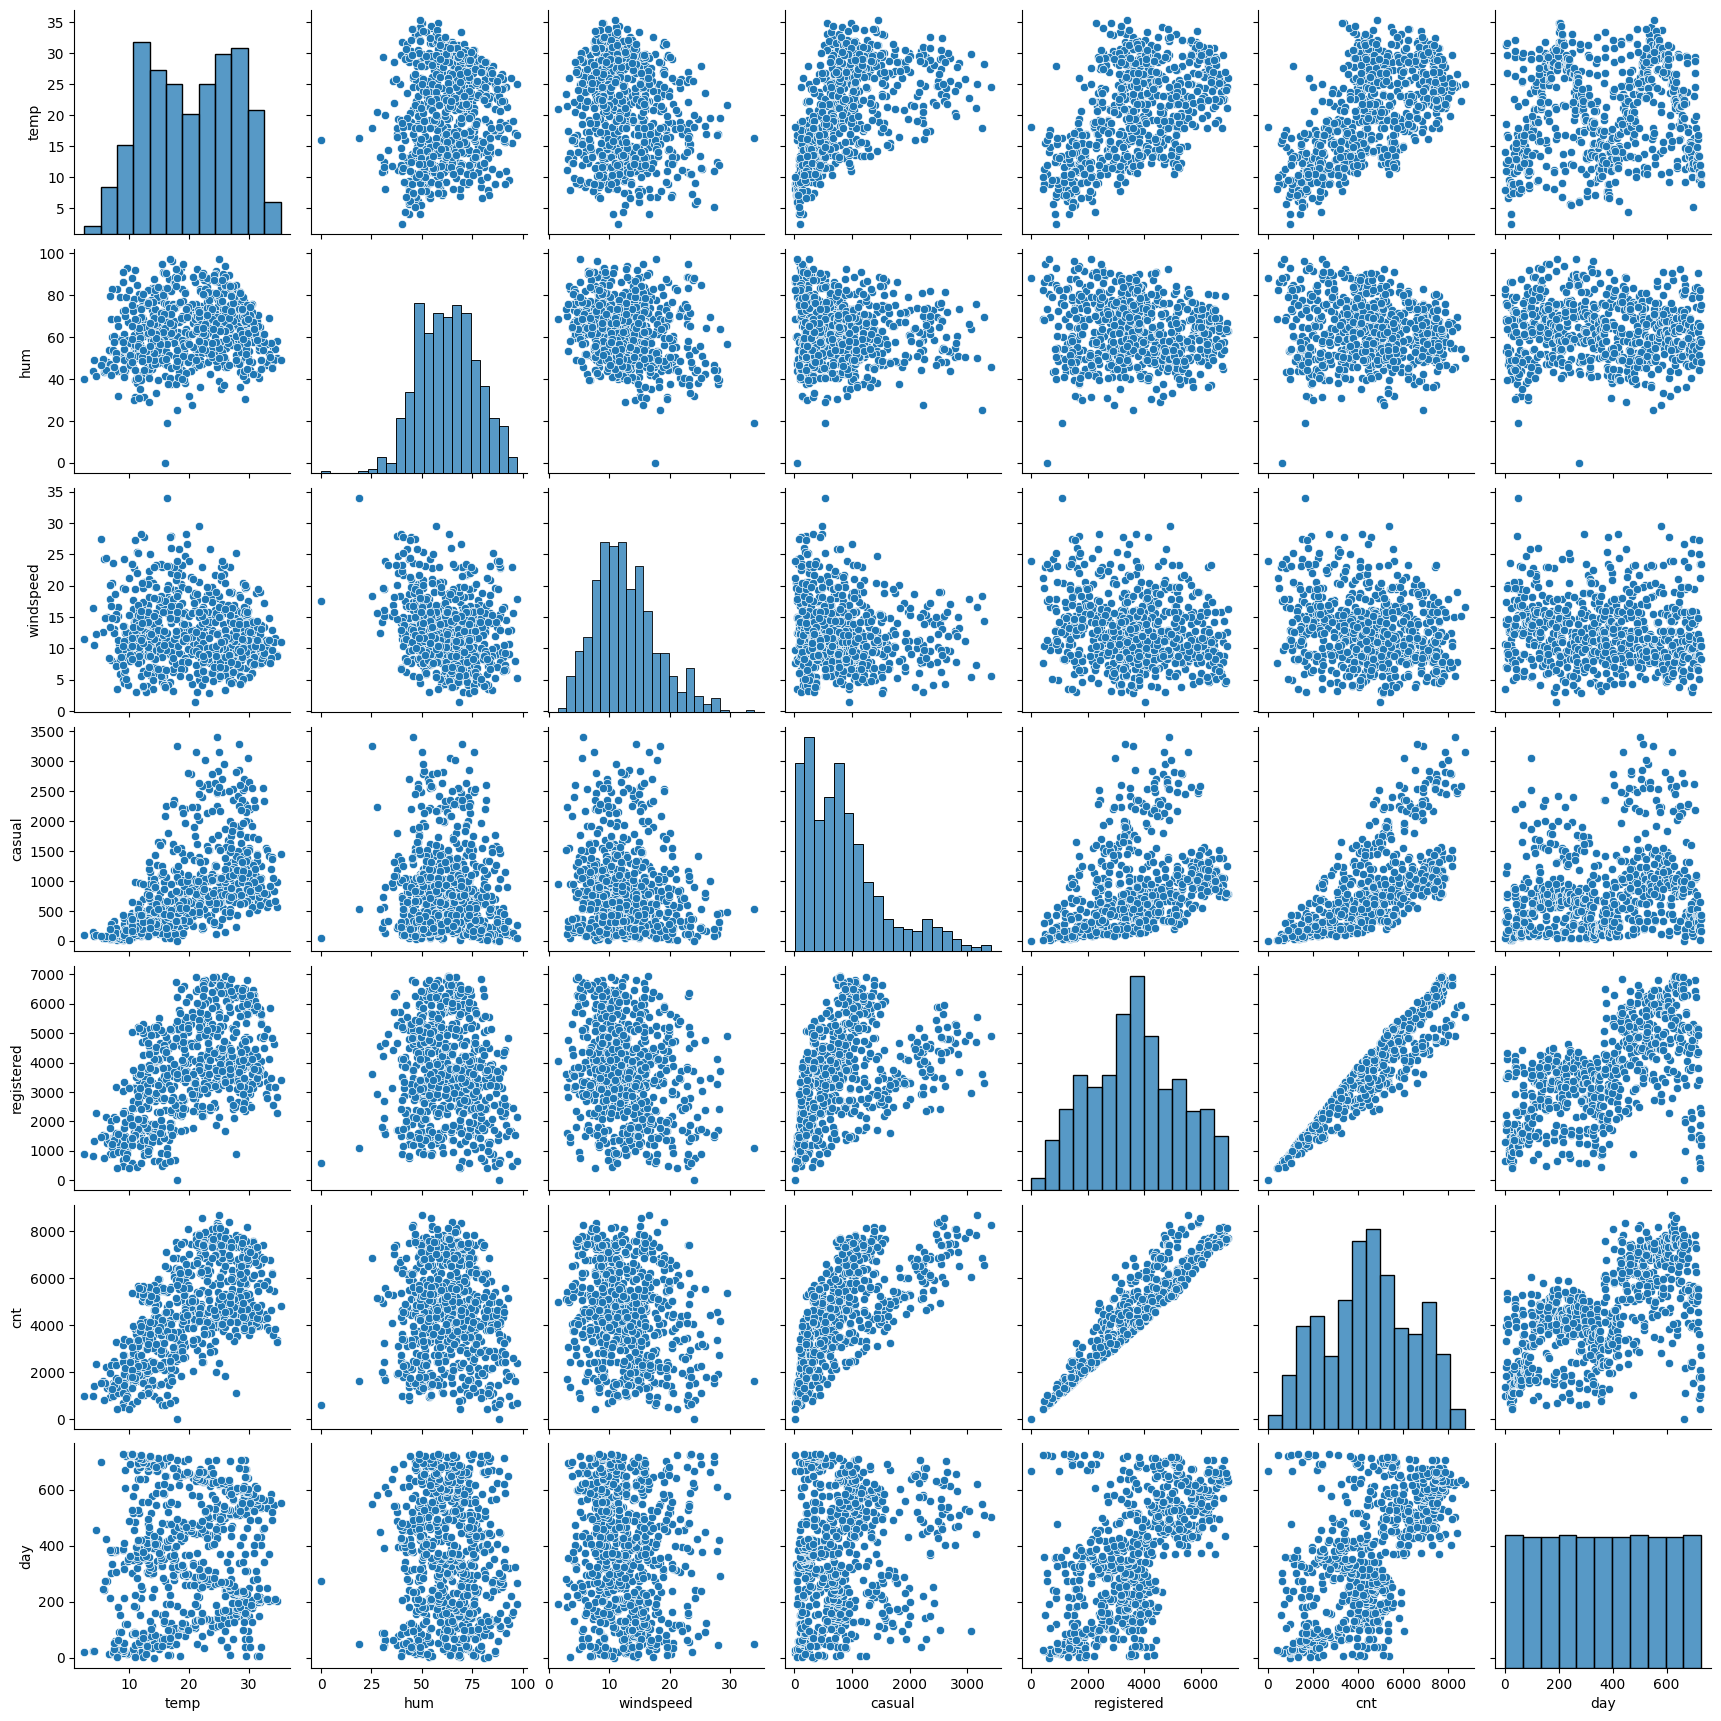

In [ ]:
#Let's make a pairplot of all the numeric variables
num = ['temp','hum','windspeed','casual','registered','cnt','day']
sns.pairplot(pd01[num])
plt.show()

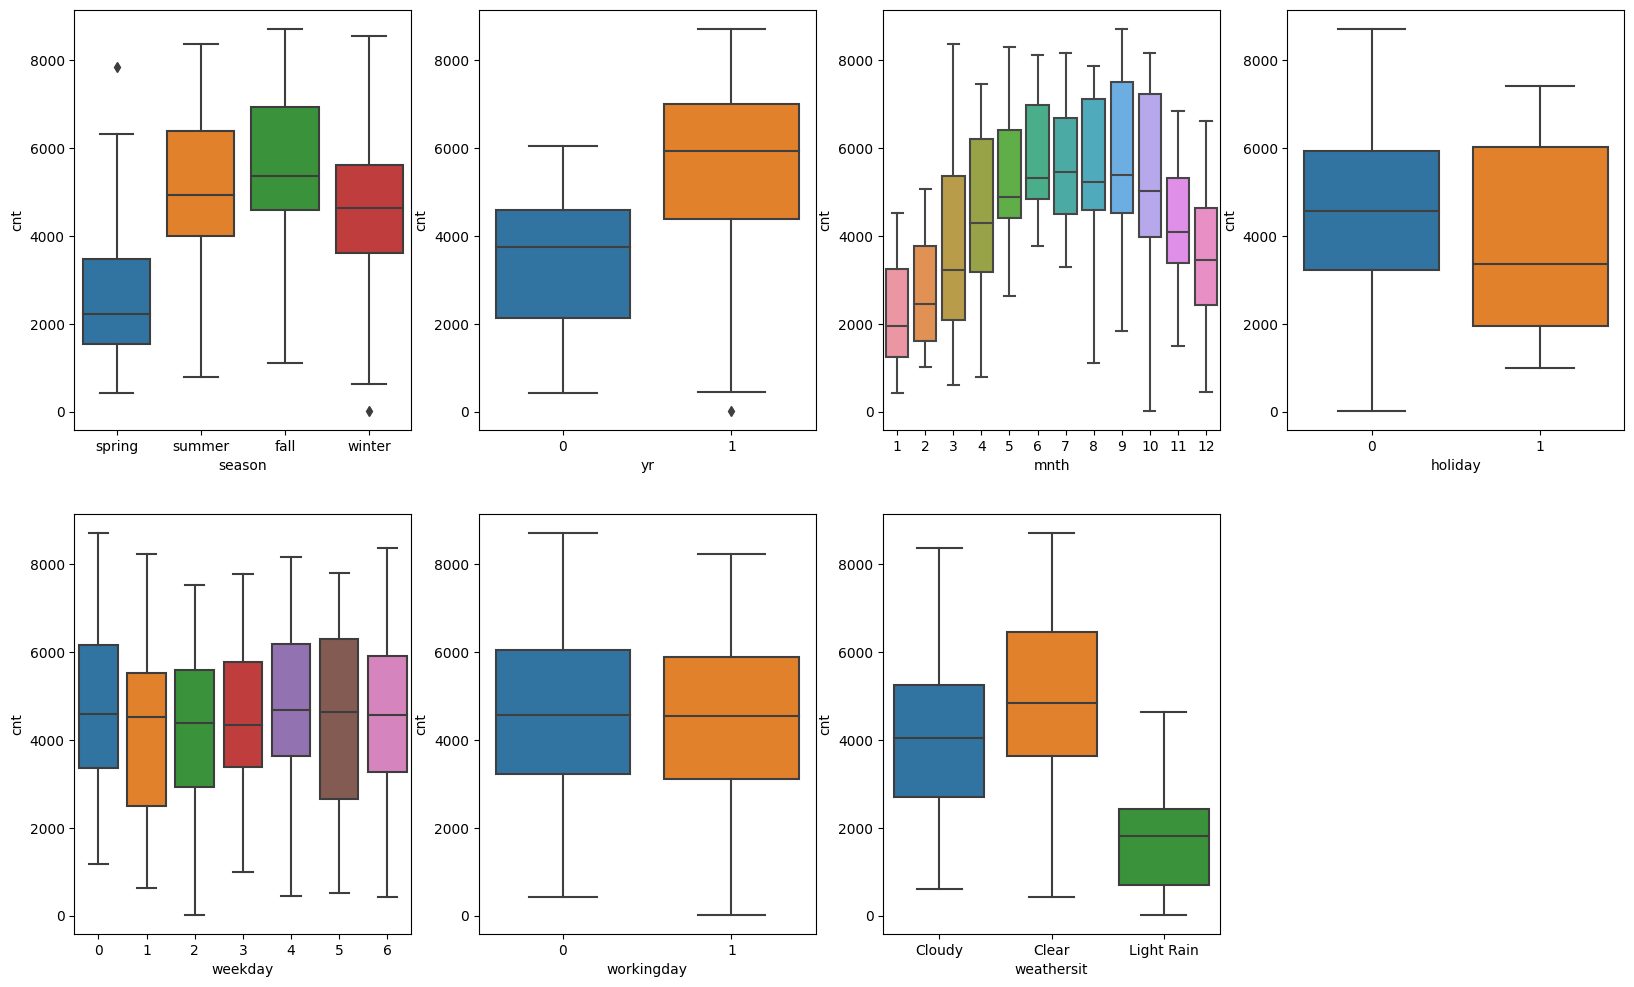

In [ ]:
# Visualising Categorical Variables
plt.figure(figsize=(20, 12))
plt.subplot(2,4,1)
sns.boxplot(x = 'season', y = 'cnt', data = pd01)
plt.subplot(2,4,2)
sns.boxplot(x = 'yr', y = 'cnt', data = pd01)
plt.subplot(2,4,3)
sns.boxplot(x = 'mnth', y = 'cnt', data = pd01)
plt.subplot(2,4,4)
sns.boxplot(x = 'holiday', y = 'cnt', data = pd01)
plt.subplot(2,4,5)
sns.boxplot(x = 'weekday', y = 'cnt', data = pd01)
plt.subplot(2,4,6)
sns.boxplot(x = 'workingday', y = 'cnt', data = pd01)
plt.subplot(2,4,7)
sns.boxplot(x = 'weathersit', y = 'cnt', data = pd01)
plt.show()

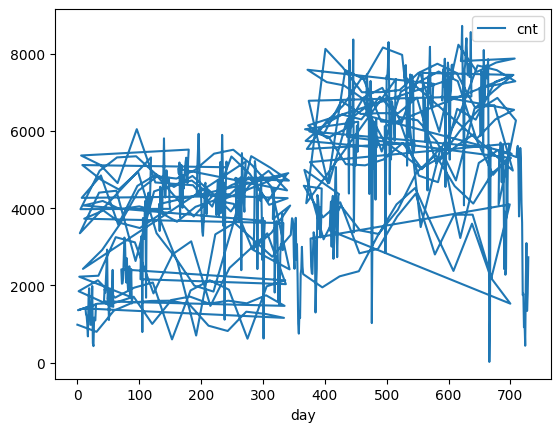

In [ ]:
# days vs Count
pd01.plot.line(x='day', y='cnt')
plt.show()

## Step 3: Data Preparation

In [ ]:
pd01

,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,hum,windspeed,casual,registered,cnt,day
0,2018-01-01,spring,0,1,0,1,1,Cloudy,14.110847,80.5833,10.749882,331,654,985,0
1,2018-02-01,spring,0,1,0,2,1,Cloudy,14.902598,69.6087,16.652113,131,670,801,31
2,2018-03-01,spring,0,1,0,3,1,Clear,8.050924,43.7273,16.636703,120,1229,1349,59
3,2018-04-01,spring,0,1,0,4,1,Clear,8.200000,59.0435,10.739832,108,1454,1562,90
4,2018-05-01,spring,0,1,0,5,1,Clear,9.305237,43.6957,12.522300,82,1518,1600,120
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
725,2019-12-27,spring,1,12,0,5,1,Cloudy,10.420847,65.2917,23.458911,247,1867,2114,725
726,2019-12-28,spring,1,12,0,6,0,Cloudy,10.386653,59.0000,10.416557,644,2451,3095,726
727,2019-12-29,spring,1,12,0,0,0,Cloudy,10.386653,75.2917,8.333661,159,1182,1341,727
728,2019-12-30,spring,1,12,0,1,1,Clear,10.489153,48.3333,23.500518,364,1432,1796,728


#### The variable "season" has 4 levels. We need to convert these levels into integer as well.

In [ ]:
season_dummy = pd.get_dummies(pd01['season'])
season_dummy.head()

,fall,spring,summer,winter
0,0,1,0,0
1,0,1,0,0
2,0,1,0,0
3,0,1,0,0
4,0,1,0,0


We can drop the `fall` column, as the type of fall can be identified with just the last three columns where —
- `000` will correspond to `fall`
- `100` will correspond to `spring`
- `010` will correspond to `summer`
- `001` will correspond to `winter`

In [ ]:
# Let's drop the first column from pd01 df using 'drop_first = True'
season_dummy = pd.get_dummies(pd01['season'], drop_first = True)
# Add the results to the original pd01 dataframe
pd01 = pd.concat([pd01, season_dummy], axis = 1)
pd01

,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,hum,windspeed,casual,registered,cnt,day,spring,summer,winter
0,2018-01-01,spring,0,1,0,1,1,Cloudy,14.110847,80.5833,10.749882,331,654,985,0,1,0,0
1,2018-02-01,spring,0,1,0,2,1,Cloudy,14.902598,69.6087,16.652113,131,670,801,31,1,0,0
2,2018-03-01,spring,0,1,0,3,1,Clear,8.050924,43.7273,16.636703,120,1229,1349,59,1,0,0
3,2018-04-01,spring,0,1,0,4,1,Clear,8.200000,59.0435,10.739832,108,1454,1562,90,1,0,0
4,2018-05-01,spring,0,1,0,5,1,Clear,9.305237,43.6957,12.522300,82,1518,1600,120,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
725,2019-12-27,spring,1,12,0,5,1,Cloudy,10.420847,65.2917,23.458911,247,1867,2114,725,1,0,0
726,2019-12-28,spring,1,12,0,6,0,Cloudy,10.386653,59.0000,10.416557,644,2451,3095,726,1,0,0
727,2019-12-29,spring,1,12,0,0,0,Cloudy,10.386653,75.2917,8.333661,159,1182,1341,727,1,0,0
728,2019-12-30,spring,1,12,0,1,1,Clear,10.489153,48.3333,23.500518,364,1432,1796,728,1,0,0


In [ ]:
# Drop 'season' as we have created the dummies for it
pd01.drop(['season'], axis = 1, inplace = True)

In [ ]:
pd01

,dteday,yr,mnth,holiday,weekday,workingday,weathersit,temp,hum,windspeed,casual,registered,cnt,day,spring,summer,winter
0,2018-01-01,0,1,0,1,1,Cloudy,14.110847,80.5833,10.749882,331,654,985,0,1,0,0
1,2018-02-01,0,1,0,2,1,Cloudy,14.902598,69.6087,16.652113,131,670,801,31,1,0,0
2,2018-03-01,0,1,0,3,1,Clear,8.050924,43.7273,16.636703,120,1229,1349,59,1,0,0
3,2018-04-01,0,1,0,4,1,Clear,8.200000,59.0435,10.739832,108,1454,1562,90,1,0,0
4,2018-05-01,0,1,0,5,1,Clear,9.305237,43.6957,12.522300,82,1518,1600,120,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
725,2019-12-27,1,12,0,5,1,Cloudy,10.420847,65.2917,23.458911,247,1867,2114,725,1,0,0
726,2019-12-28,1,12,0,6,0,Cloudy,10.386653,59.0000,10.416557,644,2451,3095,726,1,0,0
727,2019-12-29,1,12,0,0,0,Cloudy,10.386653,75.2917,8.333661,159,1182,1341,727,1,0,0
728,2019-12-30,1,12,0,1,1,Clear,10.489153,48.3333,23.500518,364,1432,1796,728,1,0,0


In [ ]:
pd.set_option('display.max_columns', None)
pd01.head()

,dteday,yr,mnth,holiday,weekday,workingday,weathersit,temp,hum,windspeed,casual,registered,cnt,day,spring,summer,winter
0,2018-01-01,0,1,0,1,1,Cloudy,14.110847,80.5833,10.749882,331,654,985,0,1,0,0
1,2018-02-01,0,1,0,2,1,Cloudy,14.902598,69.6087,16.652113,131,670,801,31,1,0,0
2,2018-03-01,0,1,0,3,1,Clear,8.050924,43.7273,16.636703,120,1229,1349,59,1,0,0
3,2018-04-01,0,1,0,4,1,Clear,8.200000,59.0435,10.739832,108,1454,1562,90,1,0,0
4,2018-05-01,0,1,0,5,1,Clear,9.305237,43.6957,12.522300,82,1518,1600,120,1,0,0


#### The variable "weathersit" has 3 levels. We need to convert these levels into integer as well.

In [ ]:
weather_dummy = pd.get_dummies(pd01['weathersit'])
weather_dummy.head()

,Clear,Cloudy,Light Rain
0,0,1,0
1,0,1,0
2,1,0,0
3,1,0,0
4,1,0,0


We can drop the `weathersit` column
- `00` will correspond to `Clear`
- `10` will correspond to `Cloudy`
- `01` will correspond to `Light Rain`

In [ ]:
# Let's drop the first column from pd01 df using 'drop_first = True'
weather_dummy = pd.get_dummies(pd01['weathersit'], drop_first = True)
# Add the results to the original pd01 dataframe
pd01 = pd.concat([pd01, weather_dummy], axis = 1)
# Drop 'season' as we have created the dummies for it
pd01.drop(['weathersit'], axis = 1, inplace = True)
pd01

,dteday,yr,mnth,holiday,weekday,workingday,temp,hum,windspeed,casual,registered,cnt,day,spring,summer,winter,Cloudy,Light Rain
0,2018-01-01,0,1,0,1,1,14.110847,80.5833,10.749882,331,654,985,0,1,0,0,1,0
1,2018-02-01,0,1,0,2,1,14.902598,69.6087,16.652113,131,670,801,31,1,0,0,1,0
2,2018-03-01,0,1,0,3,1,8.050924,43.7273,16.636703,120,1229,1349,59,1,0,0,0,0
3,2018-04-01,0,1,0,4,1,8.200000,59.0435,10.739832,108,1454,1562,90,1,0,0,0,0
4,2018-05-01,0,1,0,5,1,9.305237,43.6957,12.522300,82,1518,1600,120,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
725,2019-12-27,1,12,0,5,1,10.420847,65.2917,23.458911,247,1867,2114,725,1,0,0,1,0
726,2019-12-28,1,12,0,6,0,10.386653,59.0000,10.416557,644,2451,3095,726,1,0,0,1,0
727,2019-12-29,1,12,0,0,0,10.386653,75.2917,8.333661,159,1182,1341,727,1,0,0,1,0
728,2019-12-30,1,12,0,1,1,10.489153,48.3333,23.500518,364,1432,1796,728,1,0,0,0,0


## Step 4: Splitting the Data into Training and Testing Sets

In [ ]:
from sklearn.model_selection import train_test_split

# We specify this so that the train and test data set always have the same rows, respectively
np.random.seed(0)
df_train, df_test = train_test_split(pd01, train_size = 0.7, test_size = 0.3, random_state = 100)

### Rescaling the Features

In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

In [ ]:
# Apply scaler() to all the columns except the 'dummy' and 0 and 1 variables
num_vars = ['temp', 'hum', 'windspeed', 'casual', 'registered','cnt']

df_train[num_vars] = scaler.fit_transform(df_train[num_vars])

In [ ]:
df_train.head()

,dteday,yr,mnth,holiday,weekday,workingday,temp,hum,windspeed,casual,registered,cnt,day,spring,summer,winter,Cloudy,Light Rain
653,2019-10-16,1,10,0,3,1,0.509887,0.575354,0.300794,0.280402,0.951776,0.864243,653,0,0,1,0,0
576,2019-07-31,1,7,0,3,1,0.815169,0.725633,0.264686,0.294422,0.899220,0.827658,576,0,0,0,0,0
426,2019-03-03,1,3,0,0,0,0.442393,0.640189,0.255342,0.290765,0.446145,0.465255,426,1,0,0,1,0
728,2019-12-30,1,12,0,1,1,0.245101,0.498067,0.663106,0.110332,0.203869,0.204096,728,1,0,0,0,0
482,2019-04-28,1,4,0,0,0,0.395666,0.504508,0.188475,0.340750,0.444701,0.482973,482,0,1,0,1,0


In [ ]:
df_train.describe()

,yr,mnth,holiday,weekday,workingday,temp,hum,windspeed,casual,registered,cnt,day,spring,summer,winter,Cloudy,Light Rain
count,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.00000,510.000000,510.000000
mean,0.507843,6.549020,0.025490,2.950980,0.711765,0.537262,0.650369,0.320768,0.254661,0.523944,0.513620,366.878431,0.243137,0.245098,0.24902,0.343137,0.029412
std,0.500429,3.468714,0.157763,1.977166,0.453386,0.225844,0.145882,0.169797,0.206011,0.228175,0.224593,212.604831,0.429398,0.430568,0.43287,0.475223,0.169124
min,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
25%,0.000000,3.000000,0.000000,1.000000,0.000000,0.339853,0.538643,0.199179,0.094179,0.353487,0.356420,181.250000,0.000000,0.000000,0.00000,0.000000,0.000000
50%,1.000000,7.000000,0.000000,3.000000,1.000000,0.540519,0.653714,0.296763,0.212740,0.525123,0.518638,369.500000,0.000000,0.000000,0.00000,0.000000,0.000000
75%,1.000000,10.000000,0.000000,5.000000,1.000000,0.735215,0.754830,0.414447,0.327415,0.696073,0.684710,552.750000,0.000000,0.000000,0.00000,1.000000,0.000000
max,1.000000,12.000000,1.000000,6.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,728.000000,1.000000,1.000000,1.00000,1.000000,1.000000


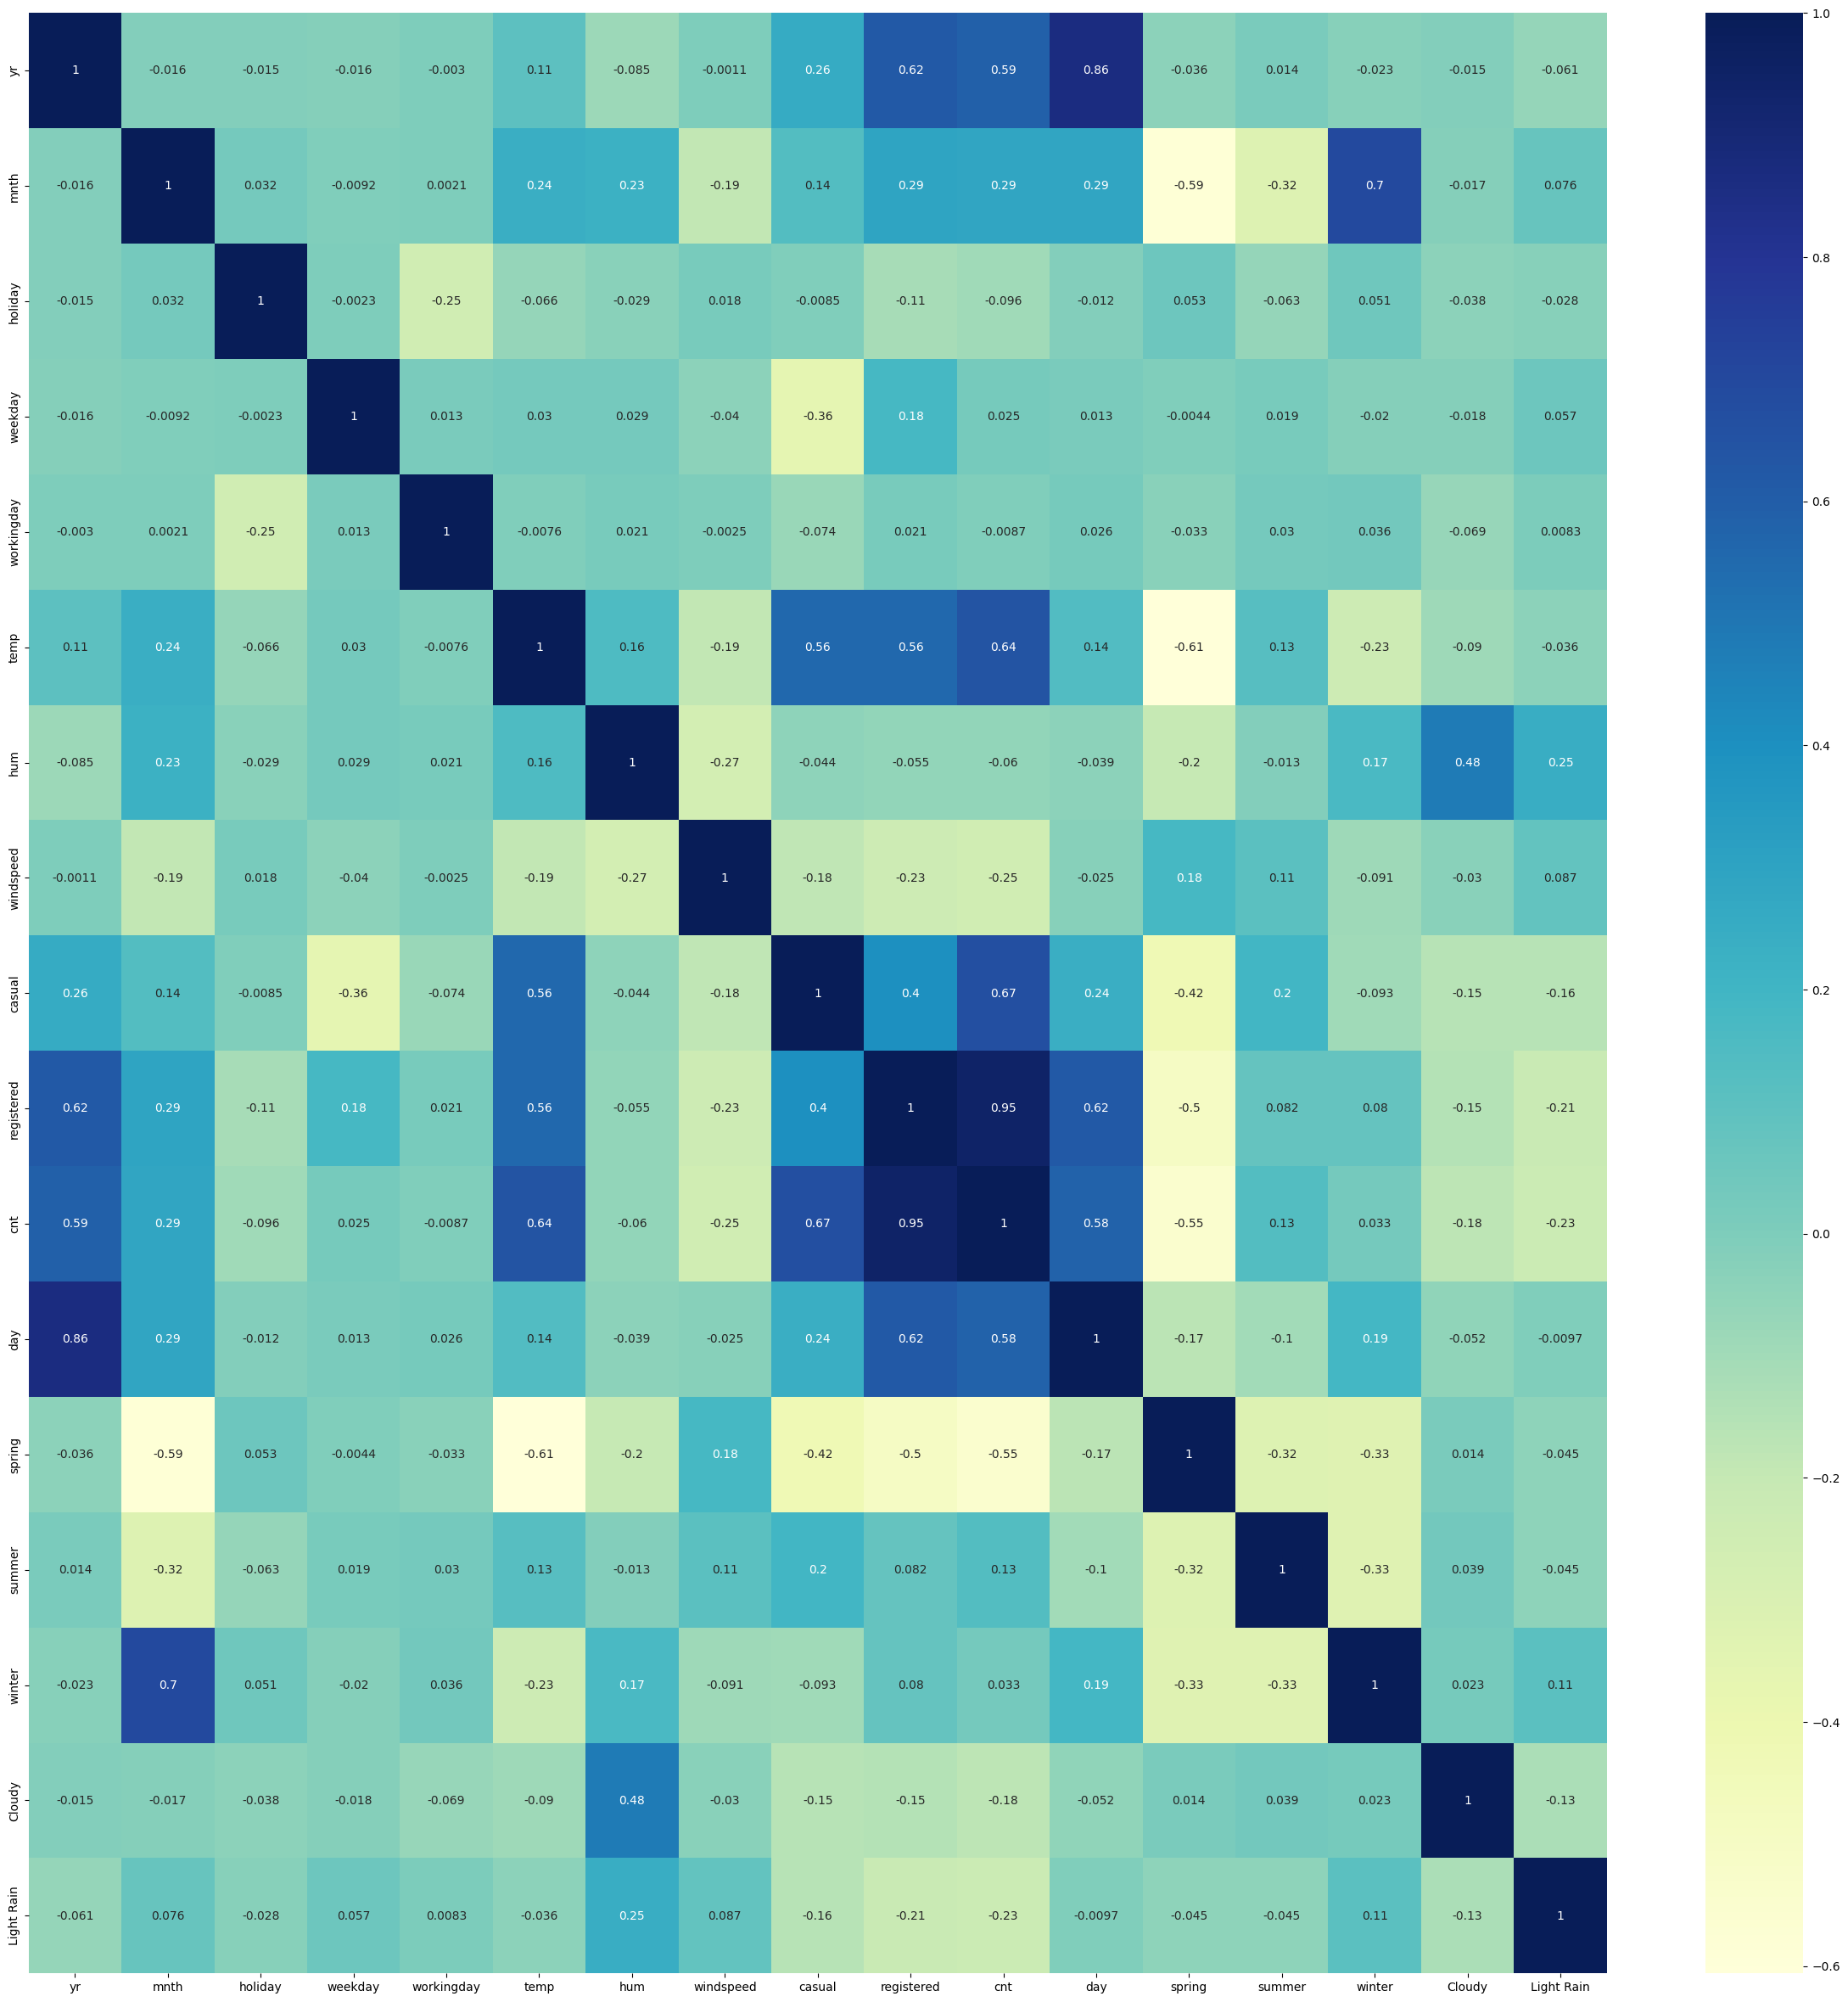

In [ ]:
# Let's check the correlation coefficients to see which variables are highly correlated

plt.figure(figsize = (30, 30))
sns.heatmap(df_train.corr(), annot = True, cmap="YlGnBu")
plt.show()

## Step 5: Building a linear model

In [ ]:
import statsmodels.api as sm
from sklearn.linear_model import LinearRegression
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.metrics import mean_squared_error, r2_score
lm = LinearRegression()

### Running the model


In [ ]:
# Putting feature variable to X
X = df_train[['temp','hum','windspeed','summer','mnth','Light Rain','holiday','registered']]
# Putting response variable to y
y = df_train['cnt']
# fit the model to the training data
lm.fit(X,y)
# Add Constant
X = sm.add_constant(X)
# create a fitted model in one line
lm8 = sm.OLS(y,X).fit()
print(lm8.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.925
Model:                            OLS   Adj. R-squared:                  0.924
Method:                 Least Squares   F-statistic:                     772.2
Date:                Fri, 06 Oct 2023   Prob (F-statistic):          3.57e-276
Time:                        11:47:46   Log-Likelihood:                 698.98
No. Observations:                 510   AIC:                            -1380.
Df Residuals:                     501   BIC:                            -1342.
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0469      0.018      2.551      0.0

In [ ]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,const,44.87
8,registered,1.76
1,temp,1.56
5,mnth,1.39
2,hum,1.28
4,summer,1.21
3,windspeed,1.20
6,Light Rain,1.14
7,holiday,1.03


In [ ]:
lm8.params

const         0.046907
temp          0.170125
hum          -0.076731
windspeed    -0.053639
summer        0.029597
mnth          0.001725
Light Rain   -0.038839
holiday       0.015880
registered    0.810398
dtype: float64

## Step 6: Residual Analysis of the train data

In [ ]:
y_pred = lm8.predict(X)

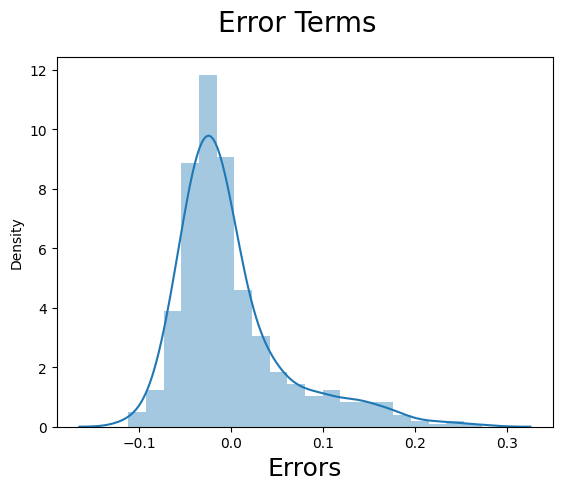

In [ ]:
# Plot the histogram of the error terms
fig = plt.figure()
sns.distplot((y - y_pred), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)                  # Plot heading
plt.xlabel('Errors', fontsize = 18)                         # X-label
plt.show()

## Step 7: Making Predictions Using the Final Model

In [ ]:
# Apply scaler() to all the columns except the 'dummy' and 0 and 1 variables
num_vars = ['temp', 'hum', 'windspeed', 'casual', 'registered','cnt']

df_test[num_vars] = scaler.fit_transform(df_test[num_vars])

In [ ]:
df_test.describe()

,yr,mnth,holiday,weekday,workingday,temp,hum,windspeed,casual,registered,cnt,day,spring,summer,winter,Cloudy,Light Rain
count,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000
mean,0.479452,6.474886,0.036530,3.100457,0.639269,0.546312,0.508750,0.418870,0.254916,0.505149,0.516216,358.388128,0.255708,0.264840,0.232877,0.319635,0.027397
std,0.500722,3.421875,0.188034,2.058536,0.481313,0.249189,0.201253,0.188111,0.209581,0.235390,0.238702,207.474902,0.437258,0.442259,0.423633,0.467403,0.163612
min,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,4.000000,0.000000,1.000000,0.000000,0.328479,0.358469,0.283817,0.096295,0.323690,0.359882,187.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,6.000000,0.000000,3.000000,1.000000,0.546045,0.494200,0.402533,0.213761,0.504523,0.520241,348.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,9.000000,0.000000,5.000000,1.000000,0.759735,0.651165,0.524362,0.347251,0.653774,0.682487,536.500000,1.000000,1.000000,0.000000,1.000000,0.000000
max,1.000000,12.000000,1.000000,6.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,729.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [ ]:
# Making predictions using the model
X_test = df_test[['temp','hum','windspeed','summer','mnth','Light Rain','holiday','registered']]
y_test = df_test['cnt']
X_test = sm.add_constant(X_test)
y_test_pred = lm8.predict(X_test)

## Step 8: Model Evaluation

In [ ]:
# calculating R-sqaured of test data
mse = mean_squared_error(y_test, y_test_pred)
r_squared = r2_score(y_test, y_test_pred)
print('Mean_Squared_Error :' ,mse)
print('r_square_value :',r_squared)

Mean_Squared_Error : 0.005277543664613144
r_square_value : 0.9069517324413884


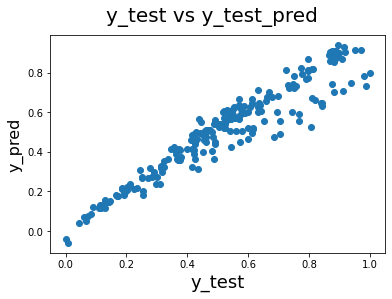

In [ ]:
# Plotting y_test and y_test_pred to understand the spread

fig = plt.figure()
plt.scatter(y_test, y_test_pred)
fig.suptitle('y_test vs y_test_pred', fontsize = 20)              # Plot heading
plt.xlabel('y_test', fontsize = 18)                          # X-label
plt.ylabel('y_pred', fontsize = 16)
plt.show()

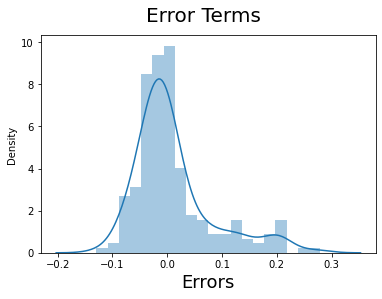

In [ ]:
# Plot the histogram of the error terms
fig = plt.figure()
sns.distplot((y_test - y_test_pred), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)                  # Plot heading
plt.xlabel('Errors', fontsize = 18)                         # X-label
plt.show()

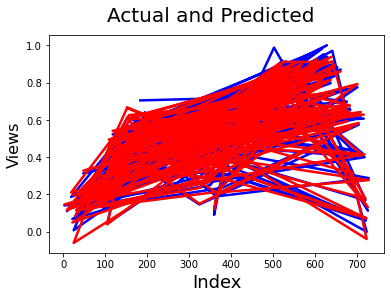

In [ ]:
#Actual vs Predicted
fig = plt.figure()
plt.plot(y_test, color="blue", linewidth=2.5, linestyle="-")
plt.plot(y_test_pred, color="red",  linewidth=2.5, linestyle="-")
fig.suptitle('Actual and Predicted', fontsize=20)              # Plot heading
plt.xlabel('Index', fontsize=18)                               # X-label
plt.ylabel('Views', fontsize=16)
plt.show()